In [76]:
import numpy as np 
import pandas as pd

In [77]:
car=pd.read_csv('car data.csv')

In [78]:
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [79]:
car.shape

(301, 9)

In [80]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [81]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [82]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [83]:
car['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [84]:
car['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [85]:
car['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [86]:
car.duplicated().sum()

2

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

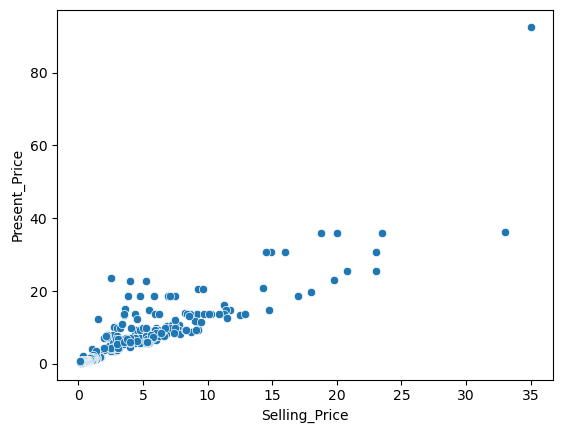

In [87]:
import seaborn as sns
sns.scatterplot(x='Selling_Price',y='Present_Price',data=car)
# its seems a positive correlation between two values. as selling prices increases the present price
# also increases.

<Axes: xlabel='Fuel_Type', ylabel='count'>

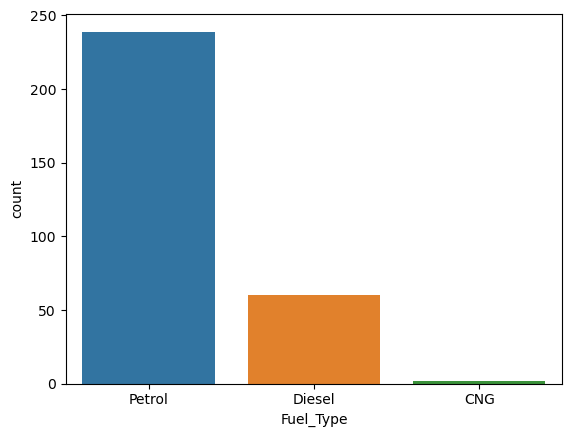

In [88]:
sns.countplot(x='Fuel_Type',data=car) 
# this shows there are more petrol car than diesel or CNG

<Axes: xlabel='Transmission', ylabel='count'>

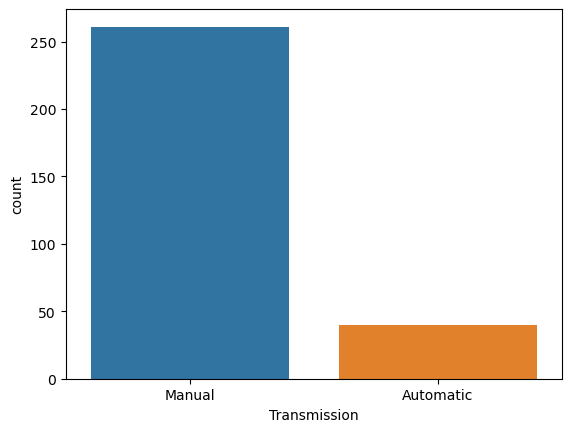

In [89]:
sns.countplot(x='Transmission',data=car) 

<Axes: xlabel='Selling_type', ylabel='count'>

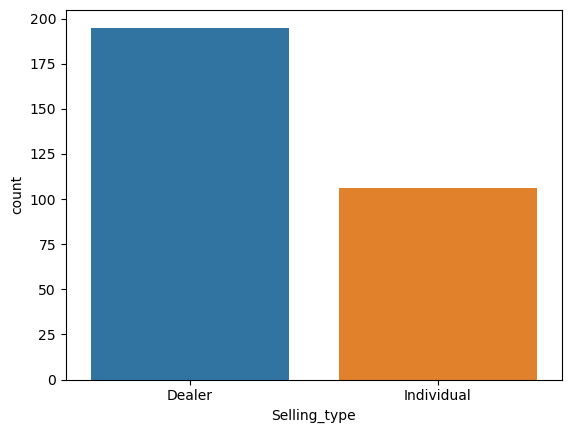

In [90]:
sns.countplot(x='Selling_type',data=car) 

<Axes: ylabel='count'>

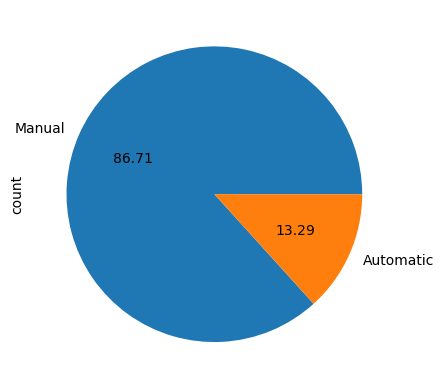

In [91]:
car["Transmission"].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

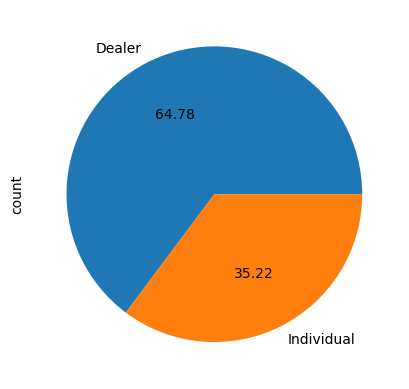

In [92]:
car["Selling_type"].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

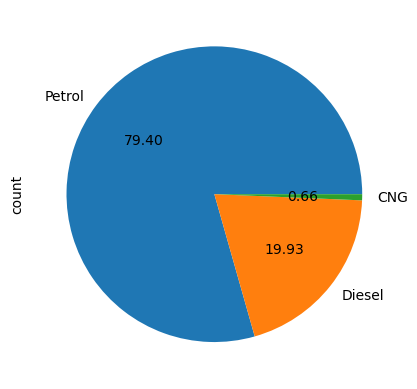

In [18]:
car["Fuel_Type"].value_counts().plot(kind='pie',autopct='%.2f')

In [93]:
car.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

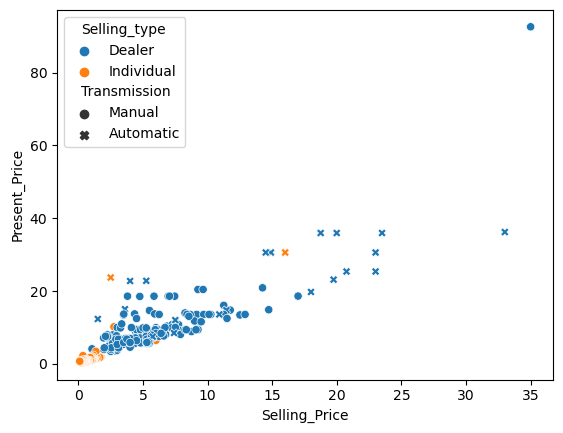

In [94]:
sns.scatterplot(x='Selling_Price',y='Present_Price',hue='Selling_type',style='Transmission',data=car)

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

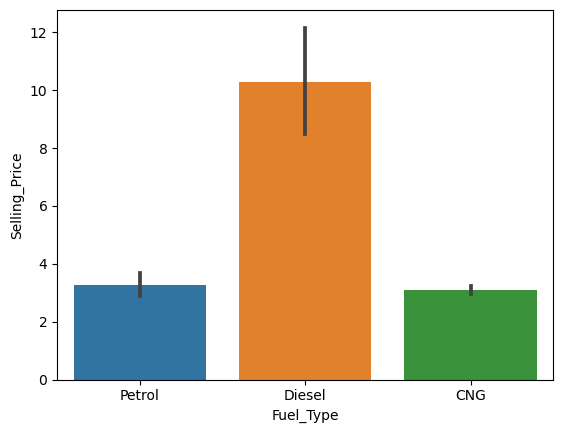

In [95]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car)

In [96]:
car.drop(columns=['Car_Name'],inplace=True)

In [97]:
car.head(2)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [98]:
car=pd.get_dummies(car,columns=['Selling_type','Transmission'],drop_first=True)

In [99]:
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

C:\Users\ABC\AppData\Local\Temp\ipykernel_15348\1596208015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [100]:
car[['Selling_type_Individual','Transmission_Manual']]=car[['Selling_type_Individual','Transmission_Manual']].astype(int)

In [101]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     301 non-null    int64  
 1   Selling_Price            301 non-null    float64
 2   Present_Price            301 non-null    float64
 3   Driven_kms               301 non-null    int64  
 4   Fuel_Type                301 non-null    int64  
 5   Owner                    301 non-null    int64  
 6   Selling_type_Individual  301 non-null    int32  
 7   Transmission_Manual      301 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 16.6 KB


In [102]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1
1,2013,4.75,9.54,43000,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1
4,2014,4.60,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,1
298,2009,3.35,11.00,87934,0,0,0,1
299,2017,11.50,12.50,9000,1,0,0,1


In [103]:
car.head(2)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1
1,2013,4.75,9.54,43000,1,0,0,1


In [104]:
X=car.drop(['Selling_Price'],axis=1)
y=car['Selling_Price']

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [106]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Owner,Selling_type_Individual,Transmission_Manual
185,2008,0.58,1900,0,0,1,0
72,2013,18.61,56001,0,0,0,1
15,2016,10.79,43000,1,0,0,1
10,2017,3.60,2135,0,0,0,1
196,2008,0.52,500000,0,0,1,0
...,...,...,...,...,...,...,...
188,2013,0.57,18000,0,0,1,1
71,2011,12.48,45000,1,0,0,1
106,2014,3.45,16500,0,1,1,1
270,2011,10.00,69341,0,0,0,1


In [107]:
y_train

185    0.25
72     7.45
15     7.75
10     2.85
196    0.17
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 210, dtype: float64

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 7)
(91, 7)
(210,)
(91,)


In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [110]:
X_train=scaler.fit_transform(X_train)


In [111]:
X_test=scaler.transform(X_test)

In [112]:
X_train

array([[-1.99046855, -0.76941713, -0.83904661, ..., -0.18730358,
         1.35566878, -2.85139173],
       [-0.24444351,  1.26298562,  0.43381798, ..., -0.18730358,
        -0.73764331,  0.35070593],
       [ 0.80317152,  0.3814887 ,  0.12793616, ..., -0.18730358,
        -0.73764331,  0.35070593],
       ...,
       [ 0.1047615 , -0.44590099, -0.49554421, ...,  3.38849211,
         1.35566878,  0.35070593],
       [-0.94285352,  0.29243722,  0.74767564, ..., -0.18730358,
        -0.73764331,  0.35070593],
       [ 1.15237653, -0.63414906, -0.78963873, ..., -0.18730358,
         1.35566878,  0.35070593]])

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr=LinearRegression()

In [115]:
lr.fit(X_train,y_train)

LinearRegression()

In [116]:
y_pred=lr.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [118]:
print('MAE: ', (metrics.mean_absolute_error(y_pred,y_test)))
print('MsE: ', (metrics.mean_squared_error(y_pred,y_test)))
print('R2 score',(metrics.r2_score(y_pred,y_test)))

MAE:  1.2581987927234455
MsE:  3.495368886013457
R2 score 0.8293505189461547


In [119]:
from sklearn import metrics

In [ ]:
# MAE and MSE tell how close the actual and predicted values are

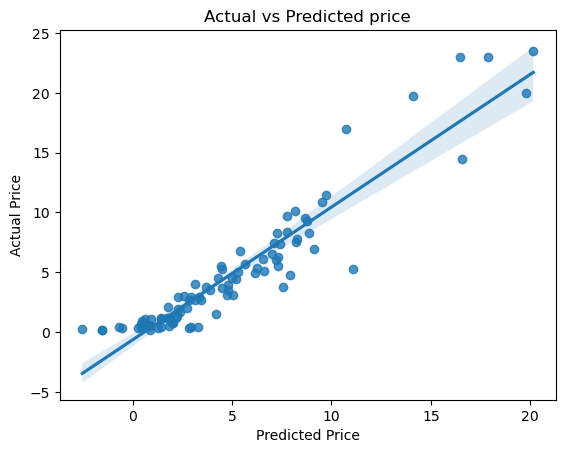

In [120]:
import matplotlib.pyplot as plt
sns.regplot(x=y_pred,y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs Predicted price')
plt.show()